In [ ]:
file=open('data/twitter2015/test.txt')

In [ ]:
dataset=file.readlines()

In [ ]:
a=dataset[0]

In [ ]:
x='exercise	O\n'.replace('\n','')

In [ ]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
encoding=tokenizer('I love w/ !')

In [ ]:
encoding

In [ ]:
tokens.index('[SEP]')

In [ ]:
print(encoding.tokens())
print(encoding.word_ids())
print(encoding.token_to_chars(2))

In [ ]:
id2tag={0:'O',1:'B-PER',2:'I-PER',3:'B-LOC',4:'I-LOC',5:'B-ORG',6:'I-ORG',7:'B-OTHER',8:'I-OTHER'}
tag2id={'O':0,'B-PER':1,'I-PER':2,'B-LOC':3,'I-LOC':4,'B-ORG':5,'I-ORG':6,'B-OTHER':7,'I-OTHER':8}
ESD_id2tag={0:'O',1:'B',2:'I'}
ESD_tag2id={'O':0,'B':1,'I':2}
Data={}
idx=0
ind=0
end=len(dataset)
while ind < end:
    text=dataset[ind]
    if text[:5]=='IMGID':
        img_id=text[6:-1]
        ind+=1
        if dataset[ind][:2]=='RT':# skip name
            ind+=3
        #read sentence
        sentence=''
        tags=[]
        ESD_tags=[]
        while ind < end:
            text = dataset[ind]
            if text=='\n':#reach the end of a sample
                ind+=1
                break
            if text[:4]=='http':#skip url
                ind+=1
                continue
            word,tag=text.replace('\n','').split('\t')
            if sentence!='':#use space to split words
                sentence+=' '
                tags.append(0)
                ESD_tags.append(0)
            sentence+=word
            #tag is mapped to char
            tags+=[tag2id[tag]]*len(word)
            ESD_tags+=[ESD_tag2id[tag[0]]]*len(word)
            ind+=1
        Data[idx]={'imgid':img_id,'sentence':sentence,'tags':tags,'ESD_tags':ESD_tags}
        idx+=1
    else:
        ind+=1

            




In [ ]:
from torch import tensor

In [ ]:
import numpy as np

In [ ]:
np.zeros((2,3))

In [ ]:
import numpy as np

In [ ]:
a=np.array([[1,2],[3,4]])

In [ ]:
a

In [ ]:
b=a.sum(1)

In [ ]:
b.shape

In [ ]:
b=b.reshape(-1,1)

In [ ]:
b.shape

In [ ]:
import torch

In [ ]:
c=torch.tensor(b)

In [ ]:
c.shape

In [ ]:
for i in range(1,5):
    print(i)

In [ ]:
from utils import TwitterDataset
from utils import TwitterColloteFn

In [ ]:
from config import config
train_data=TwitterDataset(config.test_data)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader=DataLoader(train_data,batch_size=4,shuffle=True,collate_fn=TwitterColloteFn)

In [ ]:
text_inputs,img_inputs,tags,ESD_tags=next(iter(train_loader))

In [ ]:
text_inputs

In [ ]:
train_data.W_e2n

In [ ]:
from PIL import Image
import requests

from transformers import FlavaProcessor, FlavaModel

model = FlavaModel.from_pretrained("facebook/flava-full")
processor = FlavaProcessor.from_pretrained("facebook/flava-full")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open('/home/zero_lag/Document/srtp/data/twitter2015/images/27.jpg')

inputs = processor(
  text=["a photo of a cat", "a photo of a dog"], images=[image, image], return_tensors="pt", padding="max_length", max_length=77
)

In [ ]:
inputs=processor(
  text=["a photo of a cat", "a photo of a dog and cat and cat"], images=[image, image], return_tensors="pt", padding=True)

In [ ]:
inputs

In [ ]:
def a():
    processor = FlavaProcessor.from_pretrained("facebook/flava-full")

In [ ]:
a()

In [ ]:
outputs = model(**inputs)
image_embeddings = outputs.image_embeddings # Batch size X (Number of image patches + 1) x Hidden size => 2 X 197 X 768
text_embeddings = outputs.text_embeddings # Batch size X (Text sequence length + 1) X Hidden size => 2 X 77 X 768
multimodal_embeddings = outputs.multimodal_embeddings

In [ ]:
text_embeddings

In [ ]:
def a(a,b):
    print(a,b)


In [ ]:
args={'a':1,'b':2,'c':3}
a(**args)

In [ ]:
del args['c']

In [ ]:
args

In [ ]:
inputs

In [ ]:
from transformers import BertTokenizer, BertModel

import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

model = BertModel.from_pretrained("bert-base-cased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt", padding="max_length", max_length=77)

outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [ ]:
last_hidden_states.shape

In [ ]:
text_embeddings.shape

In [ ]:
model.config.hidden_size

In [ ]:
from config import config

In [ ]:
a=open(config.train_text_path)

In [ ]:
a.readlines()[0]

In [1]:
from utils import TwitterDataset,TwitterColloteFn
from config import config
from torch.utils.data import DataLoader

In [2]:
train_data=TwitterDataset(file_path='/home/zero_lag/Document/srtp/Multimodality-Link/Mert/MNER/data/Twitter2015/train.txt',img_path=config.train_img_path)

In [3]:
train_dataloader=DataLoader(train_data,batch_size=2,shuffle=True,collate_fn=TwitterColloteFn)

In [10]:
for idx,(input,label,ESD_label) in enumerate(train_dataloader):
    mask=input['attention_mask']
    if not mask[:0].all():
        print(mask)

/home/zero_lag/Document/srtp/data/twitter2015/images/2069958.jpg
/home/zero_lag/Document/srtp/data/twitter2015/images/1060749.jpg


TypeError: cannot unpack non-iterable NoneType object

In [5]:
from PIL import Image

In [11]:
img1=Image.open('/home/zero_lag/Document/srtp/data/twitter2015/images/2069958.jpg')
img2=Image.open('/home/zero_lag/Document/srtp/data/twitter2015/images/1060749.jpg')

In [13]:
img2.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [14]:
from torch import tensor

In [15]:

a=tensor([1,0],dtype=int)

In [23]:
a.bool().type()

'torch.BoolTensor'

In [24]:
from transformers import BertModel,BertTokenizer

In [25]:
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')
encoder=BertModel.from_pretrained('bert-base-cased')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
inputs=tokenizer('I love you',return_tensors="pt", padding="max_length", max_length=config.max_length,truncation=True)

In [28]:
a=encoder(**inputs)

In [30]:
a.last_hidden_state.shape

torch.Size([1, 77, 768])

In [32]:
b=a.last_hidden_state

In [33]:
b.device

device(type='cpu')

In [34]:
import os

In [35]:
files=os.listdir('/home/zero_lag/Document/srtp/data/twitter2015/images/')

In [38]:
f

'73813.jpg'

In [39]:
a=Image.open('/home/zero_lag/Document/srtp/data/twitter2015/images/73813.jpg')

In [46]:
len(a.split())

3

In [47]:
import numpy as np

In [48]:
b=np.array(a)

In [51]:
c=b[:,:,:2]

In [53]:
c.shape

(445, 599, 2)

In [54]:
r,g,b=a.split()

In [56]:
c=Image.merge('RGB',a.split()[:3])

In [57]:
w=train_data.W_e2n

In [60]:
w.shape

torch.Size([3, 9])

In [62]:
n=w.repeat(4,1,1)

In [63]:
w

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509, 0.0000],
        [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000, 0.2231]],
       dtype=torch.float64)

In [64]:
n

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000

In [4]:
w=train_data.W_e2n

In [5]:
w.shape

torch.Size([3, 9])

In [6]:
w

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509, 0.0000],
        [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000, 0.2231]],
       dtype=torch.float64)

In [7]:
a=w.repeat(4,1,1)

In [8]:
a.shape

torch.Size([4, 3, 9])

In [9]:
a

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000, 0.1509,
          0.0000],
         [0.0000, 0.0000, 0.4151, 0.0000, 0.2412, 0.0000, 0.1206, 0.0000,
          0.2231]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.3597, 0.0000, 0.3392, 0.0000, 0.1502, 0.0000

In [10]:
a=[1,2,3,4]

In [11]:
a[:3]

[1, 2, 3]

In [12]:
from PIL import Image

In [13]:
a=Image.open('/home/zero_lag/Document/srtp/data/twitter2015/images/109338.jpg')

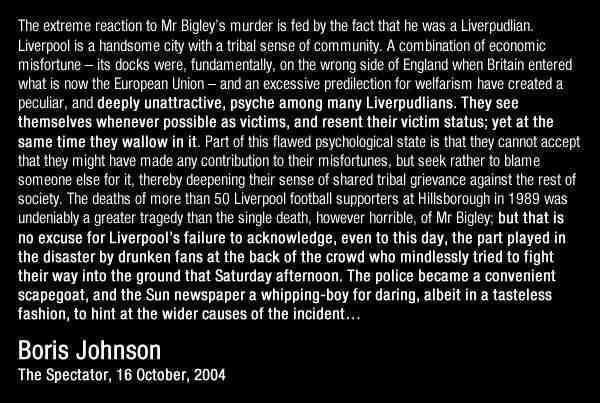

In [14]:
a

In [16]:
b=a.convert('RGB')

In [21]:
import numpy as np

In [22]:
c=np.array(b)

In [23]:
c.shape

(403, 600, 3)